In [ ]:
# default_exp mymodel01

# mymodel01

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

# Introduction

In [ ]:
!pip install nbdev==1.1.23

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


### In this notebook kernel, I'm going to predictions customers are eligible for the loan and check whether what are the missing criteria to know why customer not getting loan to make there own house.


<div class="text-success "><h4> We will learning about, Data Analysis Preprocess such as, </h4></div>

--- 

> ### Steps are:


1. [Gathering Data](#1)
- [Exploratory Data Analysis](#2)
- [Data Visualizations](#3)
- [Machine Learning Model Decision.](#4)
- [Traing the ML Model](#5)
- [Predict Model](#6)
- [Deploy Model](#7)



 
**Hope** you guys ****Love It**** and get a better **learning experience**.  🙏


---

<div class="text-danger" >
    <h4>Let's Say, You are the owner of the <b>Housing Finance Company</b> and you want to build your own model to predict the customers are applying for the home loan and company want to check and validate the customer are eligible for the home loan.
    </h4>
</div>


# <div class="text-primary"> The Problem is,  </div>

### In a Simple Term, Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms.


You will use the training set to build your model, and the test set to validate it. Both the files are stored on the web as CSV files; their URLs are already available as character strings in the sample code.



First of all, we need to importing the necessary packages to work with the data to solve our problem

# Import Packages

In [ ]:
#export
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
# Show the Dataset Path to get detaset

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 You can load this data with the `read_csv()` method from `pandas` package. It converts the data set to a python dataframe.


## Dataset Key Information.
  
---  
  
> - `Loan_ID`--------------> Unique Loan ID.
- `Gender`   --------------> Male/ Female 
- `Married`  --------------> Applicant married (Y/N) 
- `Dependents` ------------> Number of dependents 
- `Education` -------------> Applicant Education (Graduate/ Under Graduate) 
- `Self_Employed` ---------> Self-employed (Y/N) 
- `ApplicantIncome` -------> Applicant income 
- `CoapplicantIncome` -----> Coapplicant income 
- `LoanAmount`  -----------> Loan amount in thousands 
- `Loan_Amount_Term` ------> Term of a loan in months 
- `Credit_History` --------> Credit history meets guidelines 
- `Property_Area` ---------> Urban/ Semi-Urban/ Rural 
- `Loan_Status` -----------> Loan approved (Y/N) 

<a id="1"></a><br>
# 1. Gathering Data

In [ ]:
#export
#  Create New Variable and stores the dataset values as Data Frame

# loan_train = pd.read_csv('/kaggle/input/loan-eligible-dataset/loan-train.csv')
# loan_test = pd.read_csv('/kaggle/input/loan-eligible-dataset/loan-test.csv')

traindata_url="https://gist.githubusercontent.com/erwangranger/c1534647ecd6efc6188a92d69657f3bc/raw/eb6da3554971d9c3ab8f0506b37f285fb6453642/loans_train.csv"
testdata_url="https://gist.githubusercontent.com/erwangranger/43749b3d049b572ae83572719519cbbc/raw/47277db78d37994f8d9347265078be6619df234d/loans_test.csv"
loan_train = pd.read_csv(traindata_url)
loan_test = pd.read_csv(testdata_url)

- Lets display the some few information from our large datasets

Here, We shows the first five rows from datasets

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- As we can see in the above output, there are too many columns, ( columns known as features as well. )

We can also use `loan_train` to show few rows from the first five and last five record from the dataset

In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


> ### Here, we can see there are many rows and many columns, To know how many records and columns are available in our dataset, we can use the `shape` attribute or we can use `len()` to know how many records and how many features available in the dataset.

In [ ]:
print("Rows: ", len(loan_train))

Rows:  614


Pandas has inbuild attribute to get all column from the dataset, With the help of this feature we can get the how many column available we have.

In [ ]:
print("Columns: ", len(loan_train.columns))

Columns:  13


Also we can get the shape of the dataset using `shape` attribute

In [ ]:
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


> ### *After we collecting the data, Next step we need to understand what kind of data we have.*

### Also we can get the column as an list(array) from dataset

> **Note: DataFrame.columns returns the total columns of the dataset,
> Store the number of columns in variable `loan_train_columns`**

In [ ]:
#export
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Now, Understanding the Data

- First of all we use the `loan_train.describe()` method to shows the important information from the dataset
- It provides the `count`, `mean`, `standard deviation (std)`, `min`, `quartiles` and `max` in its output.

In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### As I said the above cell, this the information of all the methamatical details from dataset. Like `count`, `mean`, `standard deviation (std)`, `min`, `quartiles(25%, 50%, 75%)` and `max`.

> ### Another method is `info()`, This method show us the information about the dataset, Like

1. What's the type of culumn have?
- How many rows available in the dataset?
- What are the features are there?
- How many null values available in the dataset?
- Ans so on...

In [ ]:
loan_train.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see in the output.

1. There are `614` entries
- There are total 13 features (0 to 12)
- There are three types of datatype `dtypes: float64(4), int64(1), object(8)`
- It's Memory usage that is, `memory usage: 62.5+ KB`
- Also, We can check how many missing values available in the `Non-Null Count` column

<a id="2"></a><br>
# 2. Exploratory Data Analysis

In this section, We learn about extra information about data and it's characteristics.


- First of all, We explore object type of data
So let's make a function to know how many types of values available in the column

In [ ]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

- After defined a function, Let's call it. and check what's the output of our created function.

In [ ]:
# Now, Test and Call a function for gender only
explore_object_type(loan_train, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


- Here's one little issue occurred, Suppose in your datasets there are lots of feature to defined like this above code. 

In [ ]:
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001006    1
LP001637    1
LP002131    1
LP002050    1
LP002953    1
           ..
LP001318    1
LP001052    1
LP002051    1
LP002368    1
LP002505    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


> ## *Note: Your output maybe shorter or longer, It's totally depend upon your dataset's columns* 


- We need to fill null values with `mean` and `median` using `missingno` package

In [ ]:
#export

!pip install missingno
import missingno as msno

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [ ]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

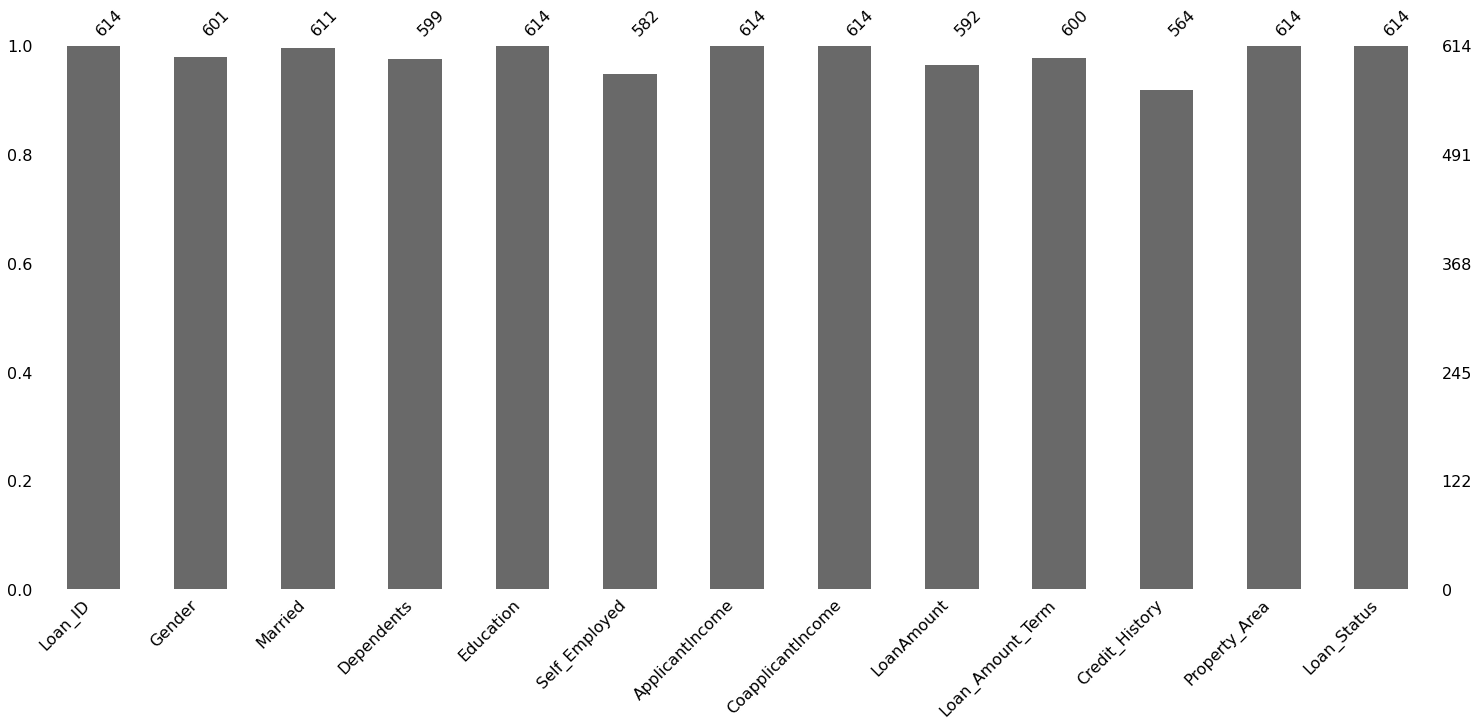

In [ ]:
msno.bar(loan_train)

<AxesSubplot:>

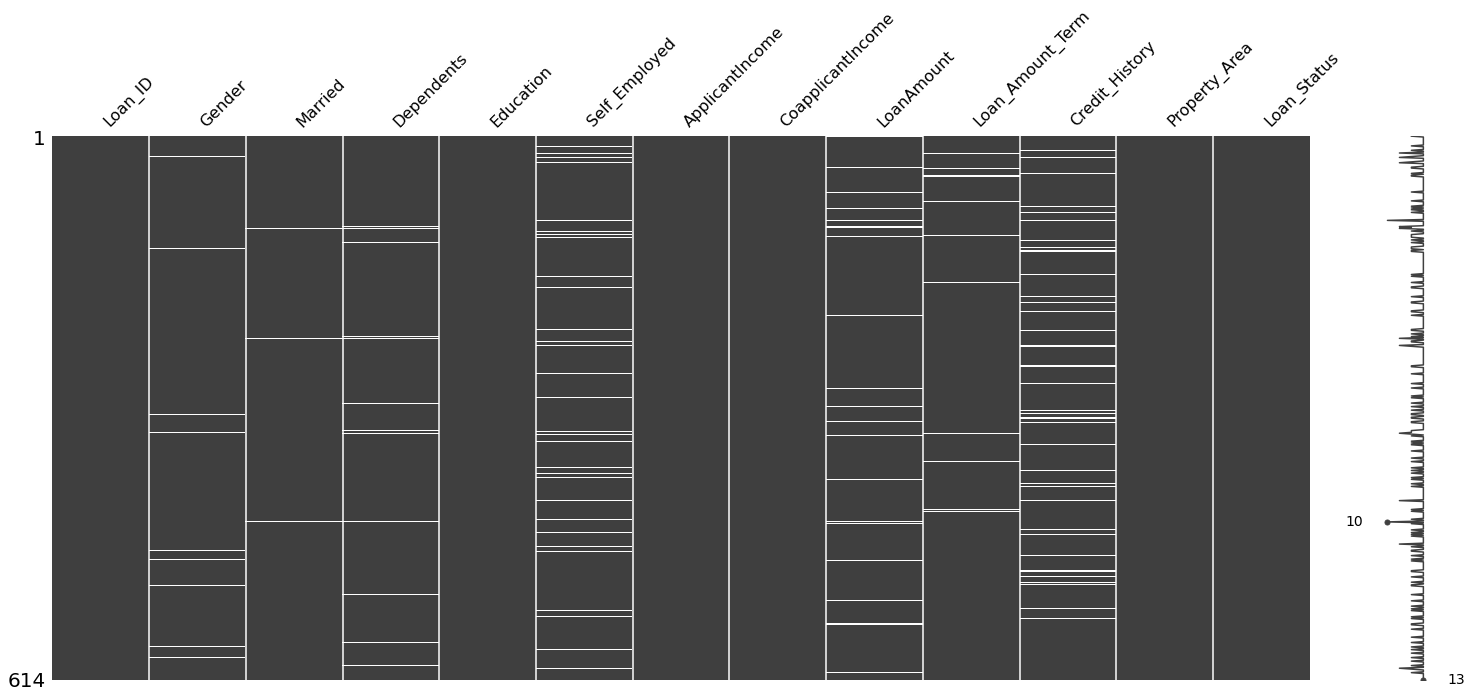

In [ ]:
msno.matrix(loan_train )


- As we can see here, there are too many columns missing with small amount of null values so we use `mean` amd `mode` to replace with `NaN` values.

In [ ]:
#export


loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

### # convert Categorical variable with Numerical values.

`Loan_Status` feature boolean values, So we replace `Y` values with `1` and `N` values with `0`
and same for other `Boolean` types of columns

In [ ]:
#export

loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})


In [ ]:
#export

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)


* Here, `Property_Area`, `Dependents` and `Education` has multiple values so now we can use `LabelEncoder` from `sklearn` package

In [ ]:
#export

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

> ### Finally, We have all the features with numerical values,

<a id="3"></a><br>
# 3. Data Visualizations


In this section, We are showing the visual information from the dataset, For that we need some pakages that are `matplotlib` and `seaborn`



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')


In [ ]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


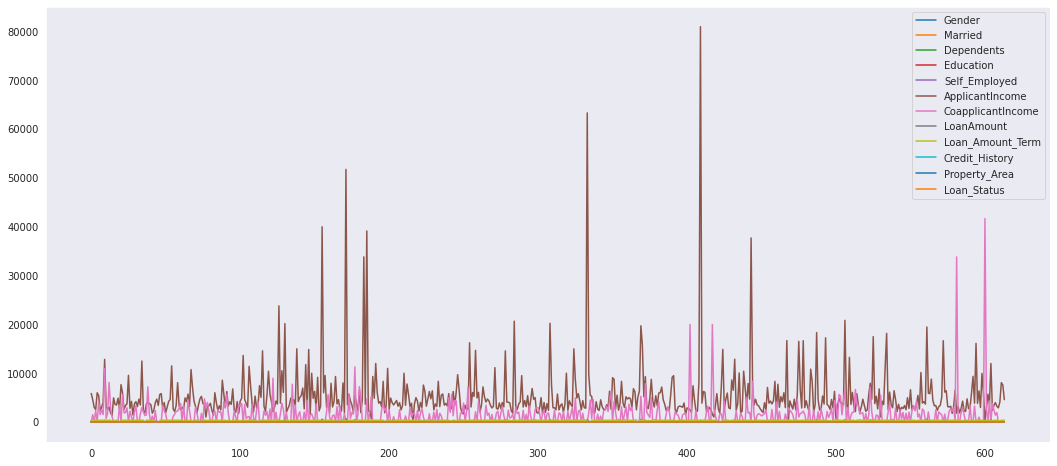

In [ ]:
loan_train.plot(figsize=(18, 8))

plt.show()

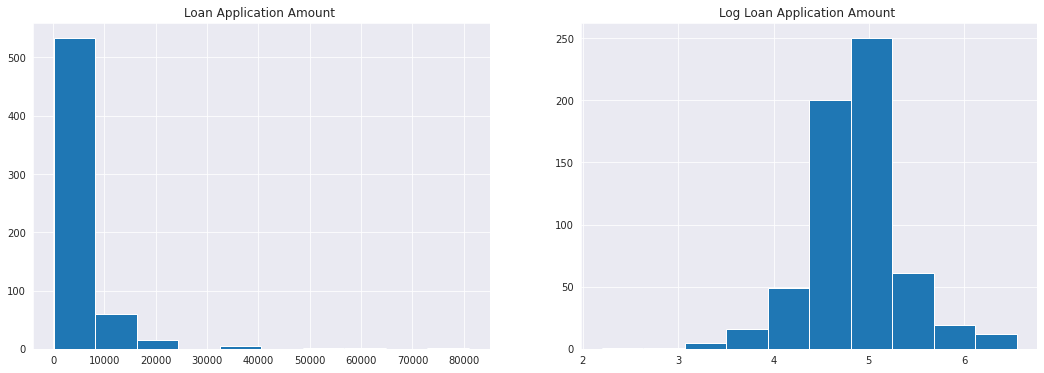

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

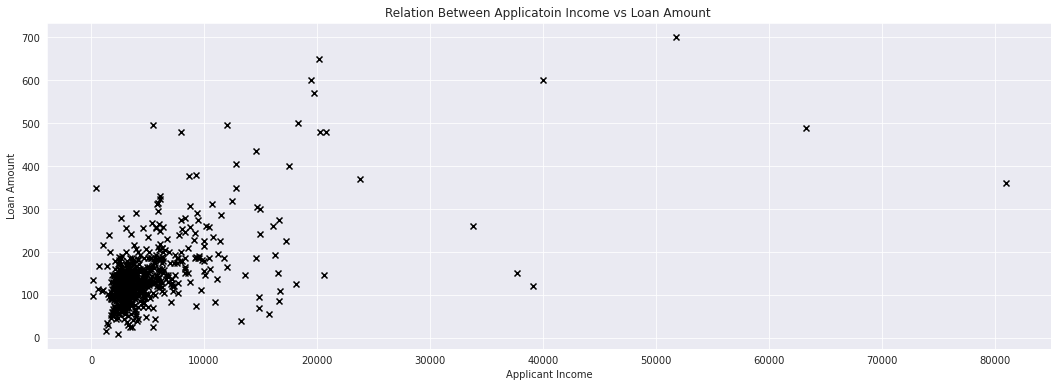

In [ ]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

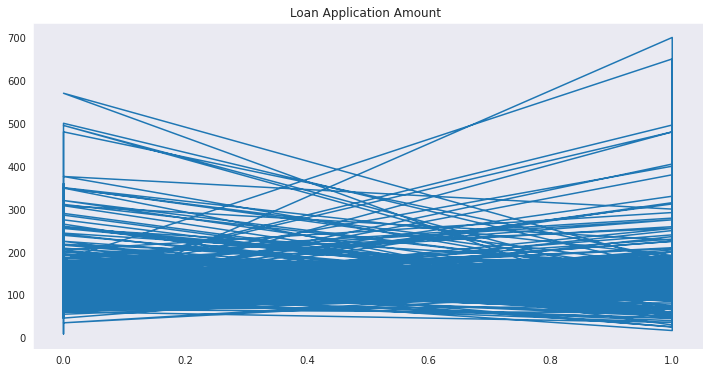

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

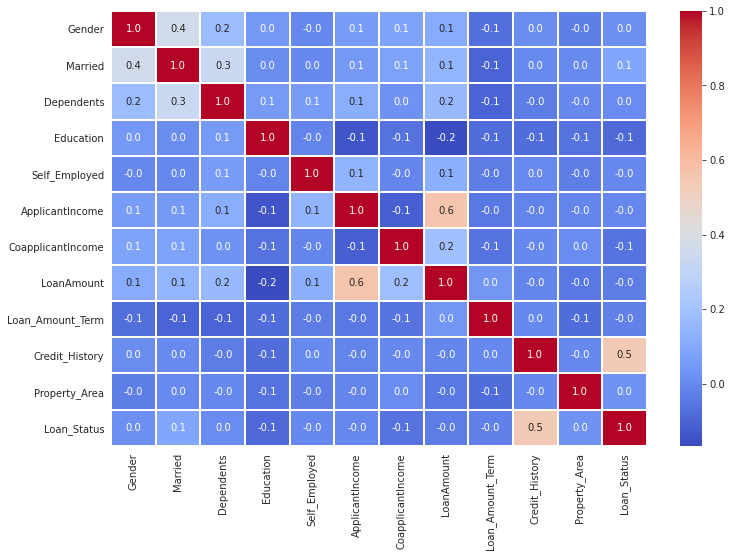

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In this heatmap, we can clearly seen the relation between two variables 

<a id="4"></a><br>
# 4. Choose ML Model.

* In this step, We have a lots of Machine Learning Model from sklearn package, and we need to decide which model is give us the better performance. then we use that model in final stage and send to the production level.

In [ ]:
#export
# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


First of all, we are use `LogisticRegression` from `sklearn.linear_model` package. Here is the little information about `LogisticRegression`.

`Logistic Regression` is a **classification algorithm**. It is used to predict a binary outcome (`1 / 0`, `Yes / No`, and `True / False`) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/logit.png)

* Let's build the model

In [ ]:
#export
logistic_model = LogisticRegression()

<a id="5"></a><br>
# 5. Traing the ML Model

> ### **Before fitting the model, We need to decide how many feature are available for testing and training, then after complete this step. fitt the model** 

Currently, we are using `Credit_History', 'Education', 'Gender` features for training so let's create train and test variables

In [ ]:
#export
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values


In [ ]:
#export
logistic_model.fit(x_train, y_train)

LogisticRegression()

<a id="6"></a><br>
# 6. Predict Model

In [ ]:
#export
# Predict the model for testin data

predicted = logistic_model.predict(x_test)


In [ ]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)


Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [ ]:
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


In [ ]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))


accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [ ]:

# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 


Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


<a id="7"></a><br>
# 7. Deploy Model


- Finally, we are done so far. The last step is to deploy our model in production map. So we need to export our model and bind with web application API. 

Using pickle we can export our model and store in to `logistic_model.pkl` file, so we can ealy access this file and calculate customize prediction using Web App API.


#### A little bit information about pickle:

`Pickle` is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions


>>  Here is example of the Pickle export model



```
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
```

In [ ]:
#export
import pickle as pkl

In [ ]:
#export
filename = 'logistic_model_01.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary

### Now, You can check your current directory. You can see the file with named "logistic_model.pkl"

- To read model from file

```
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)

```

In [ ]:
#loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
#result = loaded_model.score(x_test, y_test)

In [ ]:
from nbdev.export import *
notebook2script()


Converted 00_core.ipynb.
Converted create_model_01.ipynb.
Converted index.ipynb.
